<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/memray_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# セットアップ

In [1]:
!pip install memray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.1 MB/s eta 0:00:00


# メモリープロファイリング

In [11]:
!memray run "/content/sample.py"

Writing profile results into /content/memray-sample.py.6740.bin
Memray WARNING: Correcting symbol for aligned_alloc from 0x7b0c80e55d50 to 0x7b0c8190ac60
2023-10-28 22:29:58.166271: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 22:29:58.166355: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 22:29:58.166424: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 22:29:58.352861: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the followi

# フレームグラフ出力

In [12]:
!memray flamegraph "/content/memray-sample.py.6740.bin"

⠦ Calculating high watermark... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:00:01
⠧ Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━  89% 0:00:01
Wrote /content/memray-flamegraph-sample.py.6740.html


# フレームグラフの確認

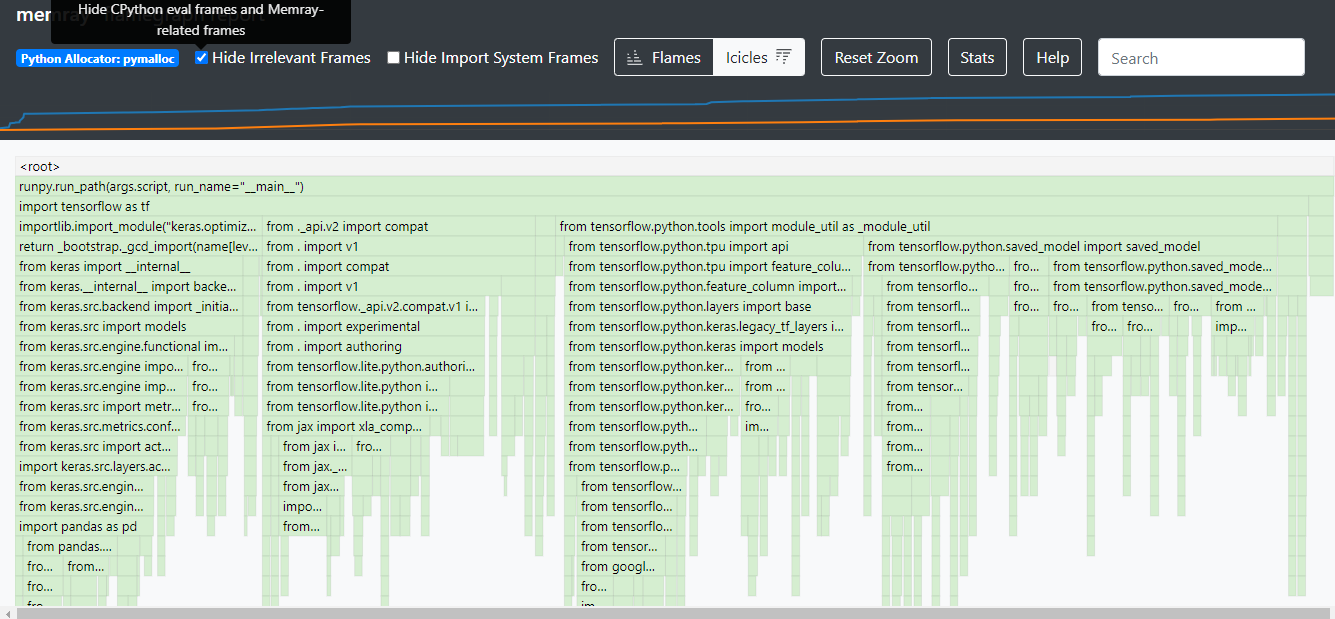

In [10]:
from IPython.display import Image,display_png
display_png(Image('/content/Flame.png'))

# ネイティブトラッキング(詳細なデータ出力)
※パフォーマンスに影響あり

In [13]:
!memray run --native "/content/sample.py"

Writing profile results into /content/memray-sample.py.7754.bin
Memray WARNING: Correcting symbol for aligned_alloc from 0x7e8746655d50 to 0x7e87470eec60
2023-10-28 22:34:09.686810: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 22:34:09.686883: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 22:34:09.686918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 22:34:09.812113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the followi

In [14]:
!memray flamegraph "/content/memray-sample.py.7754.bin"

⠴ Calculating high watermark... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━  87% 0:00:01
⚠  No debug information was found for the Python interpreter  ⚠

Without debug information reports showing native traces may not include file names and line numbers.
Please use an interpreter built with debug symbols for best results. Check 
https://bloomberg.github.io/memray/native_mode.html for more information regarding how memray 
resolves symbols.

⠼ Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━  89% 0:00:01
Wrote /content/memray-flamegraph-sample.py.7754.html


ネイティブ処理はシンボルファイルがないトラッキング出来ない  

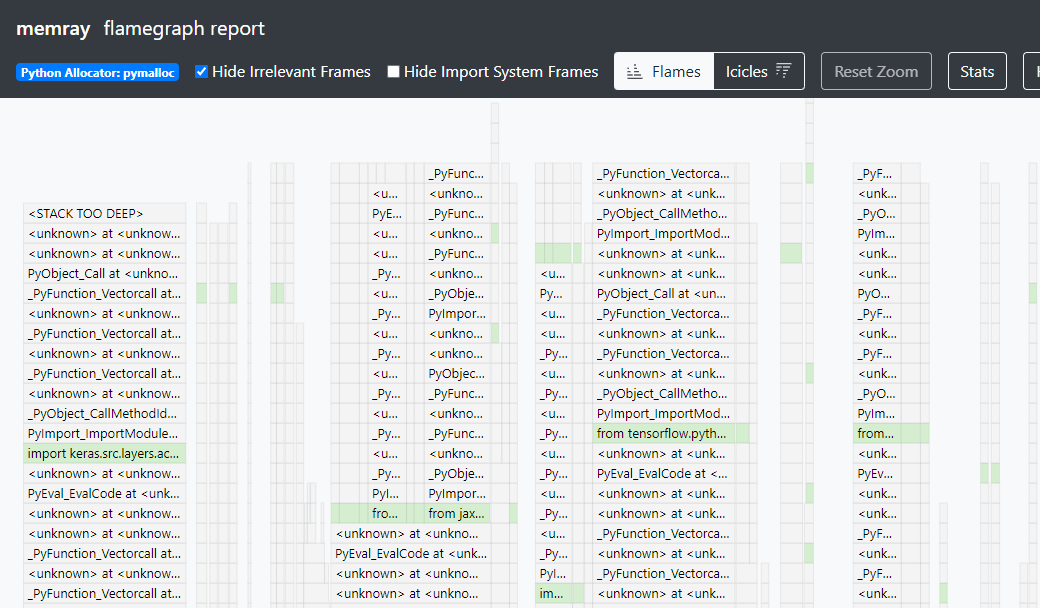

In [17]:
display_png(Image('/content/Flame2.png'))

FlameGraph出力において、プログレスバーが100%にならないで終わるので、Issueを発行してみました
https://github.com/bloomberg/memray/issues/486